In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Checking Null Values
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
# Checking Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Droping customer ID
df.drop('CustomerID', axis = 1, inplace = True)

# Display the first 5 rows
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
# Renaming Columns for Better Readability
df.rename({'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, axis = 1, inplace = True)

# Display the first 5 rows
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


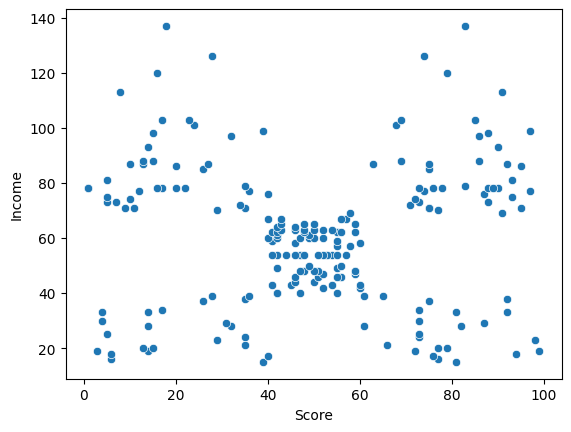

In [8]:
# Inspicting the Correlations Between Features and Targets
sns.scatterplot(y = df['Income'], x = df['Score']);

In [9]:
# Retreving the Values of the two Related Variables
x = df[['Income', 'Score']].values

In [10]:
# Initializer Standard Scaler
scaler = StandardScaler()

# Scaling Values for Standarization
x_scaled = scaler.fit_transform(x)

# Elbow Method

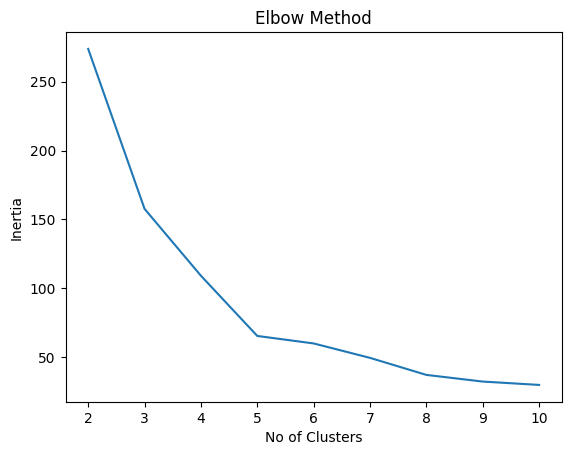

In [11]:
# Initializing empty list for inertial values
inertia = []

# Declaring range of clusters
k_range = range(2, 11)

# Loop through each value of k
for i in k_range:
  # Initialize KMeans with current number of clusters
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)

  # Fit the KMeans model to the scaled data
  kmeans.fit(x_scaled)

  # Append the inertia (sum of squared distances) to the list
  inertia.append(kmeans.inertia_)

# Plot the inertia values to visualize the Elbow Method
sns.lineplot(x = k_range, y = inertia)

# Add titles and labels to the plot
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("Inertia");

## Optimal Number of Clusters is 5.

In [12]:
# Initializing k means with the optimal number of clusters
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

# Fit the KMeans model to the scaled data
model_kmean = km.fit(x_scaled)

In [13]:
# Predicting Cluster Labels
y_pred = model_kmean.predict(x_scaled)

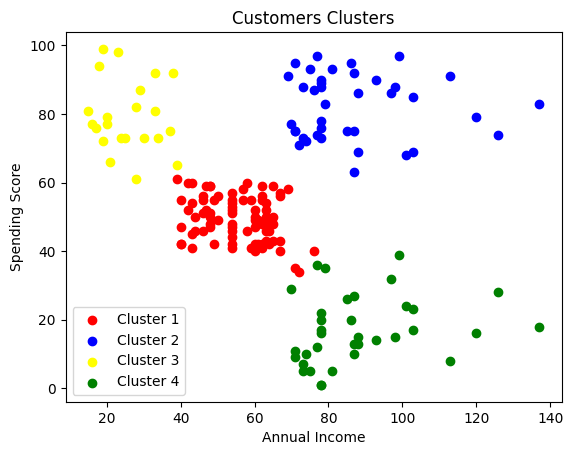

In [14]:
# Visualizing the clusters

# Scatter plot for Cluster 1
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], c='red', label='Cluster 1')

# Scatter plot for Cluster 2
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], c='blue', label='Cluster 2')

# Scatter plot for Cluster 3
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], c='yellow', label='Cluster 3')

# Scatter plot for Cluster 4
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], c='green', label='Cluster 4')

# Adding title and labels
plt.title("Customers Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()